In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

# cost함수 / 비용 구하기

## in Python

### cost 함수 만들기

In [3]:
def cost_func(W,X,Y):
    c = 0
    for i in range(len(X)):
        c += np.square(W * X[i] - Y[i])
    return c / len(X)

### 비용 계산하기

In [4]:
cost_values = []
W_values = np.linspace(-3,5,num=15)
print("{:>6} | {:>10}".format("W","cost"))

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

     W |       cost
-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


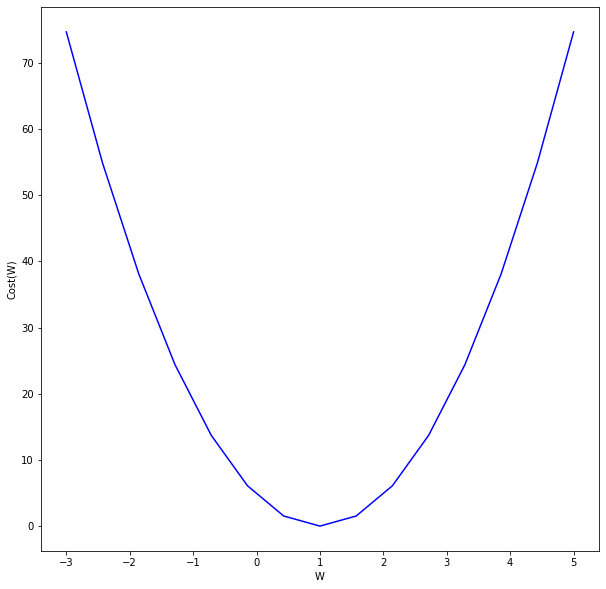

In [5]:
plt.figure(figsize = (10,10))
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

## in Tensorflow

In [6]:
X = np.array([1,2,3])
Y = np.array([1,2,3])
print("{:>6} | {:>10}".format("W","cost"))

def cost_func_tf(W,X,Y):
    hypothesis = W*X
    return tf.reduce_mean(tf.square(hypothesis-Y))

cost_values = []
W_values = np.linspace(-3,5,num=15)

for feed_W in W_values:
    curr_cost = cost_func_tf(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

     W |       cost
-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


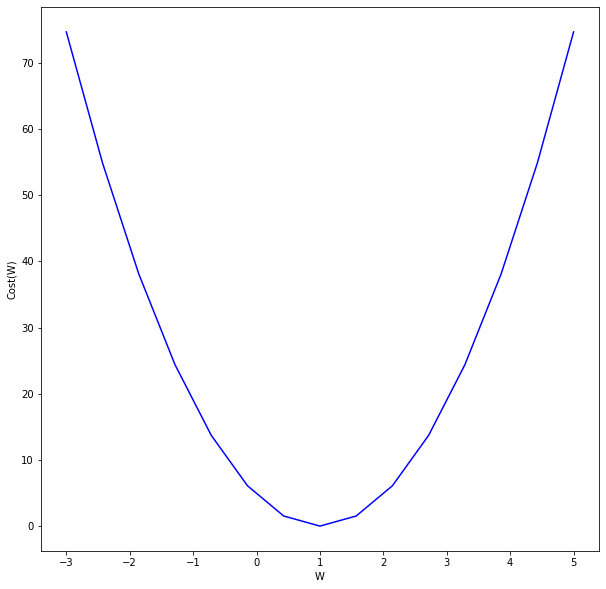

In [7]:
plt.figure(figsize = (10,10))
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

# Gradient Descent

- alpha = 0.01  
- gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y), X)  
- descent = W - alpha * gradient  
- W.assign(descent)

In [8]:
# W 를 임의의 난수로 생성

tf.random.set_seed(0)

X = np.array([1,2,3])
Y = np.array([1,2,3])
print("{:>5} | {:>10} | {:>10}".format("step", "cost", "W"))

W = tf.Variable(tf.random.normal([1], -100., 100))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(hypothesis - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print("{:5} | {:10.4f} | {:10.6f}".format(step, cost.numpy(), W.numpy()[0]))

 step |       cost |          W
    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


In [9]:
# W 를 tf.Variable() 로 생성

X = np.array([1,2,3])
Y = np.array([1,2,3])
print("{:>5} | {:>10} | {:>10}".format("step", "cost", "W"))

W = tf.Variable(5.0)

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(hypothesis - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print("{:5} | {:10.4f} | {:10.6f}".format(step, cost.numpy(), W.numpy()))

 step |       cost |          W
    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004


In [13]:
# W 를 tf.Variable() 로 생성
cost_list = []
W_list = []

X = np.array([1,2,3])
Y = np.array([1,2,3])
print("{:>5} | {:>10} | {:>10}".format("step", "cost", "W"))

W = tf.Variable(30.0)

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(hypothesis - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    W_list.append(W.numpy())
    cost_list.append(cost.numpy())
    if step % 10 == 0:
        print("{:5} | {:10.4f} | {:10.6f}".format(step, cost.numpy(), W.numpy()))

 step |       cost |          W
    0 |  3924.6667 |  28.646667
   10 |  1509.0312 |  18.143147
   20 |   580.2216 |  11.630123
   30 |   223.0948 |   7.591529
   40 |    85.7798 |   5.087276
   50 |    32.9823 |   3.534438
   60 |    12.6817 |   2.571555
   70 |     4.8761 |   1.974490
   80 |     1.8749 |   1.604262
   90 |     0.7209 |   1.374691
  100 |     0.2772 |   1.232338
  110 |     0.1066 |   1.144068
  120 |     0.0410 |   1.089334
  130 |     0.0158 |   1.055394
  140 |     0.0061 |   1.034349
  150 |     0.0023 |   1.021299
  160 |     0.0009 |   1.013207
  170 |     0.0003 |   1.008190
  180 |     0.0001 |   1.005078
  190 |     0.0001 |   1.003149
  200 |     0.0000 |   1.001953
  210 |     0.0000 |   1.001211
  220 |     0.0000 |   1.000751
  230 |     0.0000 |   1.000466
  240 |     0.0000 |   1.000289
  250 |     0.0000 |   1.000179
  260 |     0.0000 |   1.000111
  270 |     0.0000 |   1.000069
  280 |     0.0000 |   1.000043
  290 |     0.0000 |   1.000026


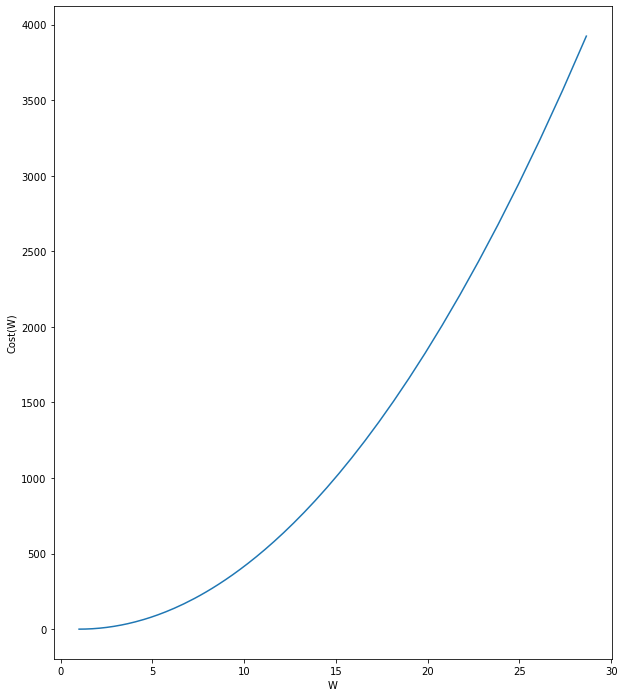

In [19]:
plt.figure(figsize = (10,12))
plt.plot(W_list, cost_list)
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()